<a href="https://colab.research.google.com/github/NaveenShetter1/deep-learning-notebooks/blob/main/plotlosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import numpy as np
import pandas as pd
dataset=pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [7]:
# now convert gender to category

dataset['Gender']=dataset['Gender'].astype('category')
dataset['Gender']=dataset['Gender'].cat.codes
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19.0,19000.0,0
1,15810944,1,35.0,20000.0,0
2,15668575,0,26.0,43000.0,0
3,15603246,0,27.0,57000.0,0
4,15804002,1,19.0,76000.0,0


In [8]:
# here userid is not required for interpreting for purchased or not so will remove

dataset=dataset.iloc[:,1:]
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0


In [9]:
# check any missing data
dataset.isnull().sum()

,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [10]:
# now divide data into X(independent) and Y(target)

x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1:]

In [12]:
x

,Gender,Age,EstimatedSalary
0,1,19.0,19000.0
1,1,35.0,20000.0
2,0,26.0,43000.0
3,0,27.0,57000.0
4,1,19.0,76000.0
...,...,...,...
395,0,46.0,41000.0
396,1,51.0,23000.0
397,0,50.0,20000.0
398,1,36.0,33000.0


In [11]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [13]:
# now devide data in training and testing wise

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_train_x=sc.fit_transform(x_train)
sc_test_x=sc.transform(x_test)


In [15]:
# import tensorflow and required libraries

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [16]:
model1=Sequential()
# first hidden layer
model1.add(Dense(128,activation='relu',input_dim=3,kernel_initializer='he_normal'))
# second hidden layer
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
# output
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# for any DNN problem the optimizer will be adam

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history1=model1.fit(sc_train_x,y_train,validation_data=(sc_test_x,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4912 - loss: 0.9451 - val_accuracy: 0.8125 - val_loss: 0.4213
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8772 - loss: 0.3349 - val_accuracy: 0.8625 - val_loss: 0.3239
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8848 - loss: 0.2799 - val_accuracy: 0.9000 - val_loss: 0.2980
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9120 - loss: 0.2217 - val_accuracy: 0.9000 - val_loss: 0.2732
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9104 - loss: 0.2460 - val_accuracy: 0.9000 - val_loss: 0.2645
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9283 - loss: 0.2041 - val_accuracy: 0.9000 - val_loss: 0.2619
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9198 - loss: 0.2278 - val_accuracy: 0.9000 - val_loss: 0.2651
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9106 - loss: 0.2398 - val_accuracy: 0.912

In [18]:
# to get weights

'''here kernel initializer will help us to initialize weights at starting than next onwards differentiation will
work by backpropogation method find optimum solution'''
model1.get_weights()



[array([[ 1.78496158e+00,  7.56791472e-01, -2.72690952e-01,
          1.72472537e+00, -9.64543223e-02, -6.01302922e-01,
          5.58261275e-01,  3.83601487e-01, -6.75715804e-01,
         -1.24908268e+00,  3.07337612e-01, -3.22870106e-01,
         -8.84669423e-02,  9.27982390e-01, -4.17298704e-01,
         -1.19261444e+00,  4.47198838e-01, -1.04840243e+00,
         -2.39724934e-01, -4.34519649e-01, -3.97084534e-01,
         -1.75417471e+00, -5.23494542e-01,  2.09726974e-01,
          1.45298231e+00, -3.99816692e-01, -1.62913397e-01,
          4.03566301e-01,  1.79977036e+00,  3.86999786e-01,
          8.81419778e-01, -6.30633712e-01,  1.16898537e+00,
          5.30580580e-01,  1.01767957e+00, -8.75490308e-01,
          1.86298043e-01,  1.11134291e+00,  4.85611856e-01,
         -2.70736188e-01, -8.47609103e-01,  6.43481791e-01,
         -6.52947605e-01, -2.57660180e-01,  3.57388645e-01,
         -8.40881288e-01, -2.40700081e-01,  7.07229599e-02,
          7.53259540e-01, -4.05317694e-0

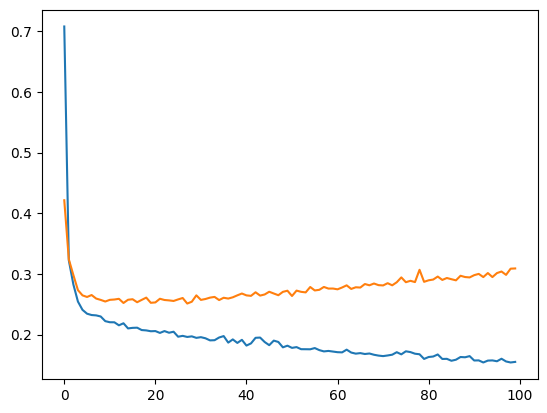

In [19]:
# plot the graph

import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [35]:
# if we try above with activation sigmoid and kernel_initializer as glorat


In [36]:
model=Sequential()
# first HL
model.add(Dense(128,activation='sigmoid',input_dim=3,kernel_initializer='glorot_normal'))
model.add(Dense(128,activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(Dense(128,activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(Dense(128,activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(Dense(128,activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(Dense(128,activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(Dense(128,activation='sigmoid',kernel_initializer='glorot_normal'))
# output
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,713 (389.50 KB)

 Trainable params: 99,713 (389.50 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(sc_train_x,y_train,validation_data=(sc_test_x,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6621 - loss: 0.6551 - val_accuracy: 0.6375 - val_loss: 0.6643
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6189 - loss: 0.6725 - val_accuracy: 0.6375 - val_loss: 0.6628
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6481 - loss: 0.6566 - val_accuracy: 0.6375 - val_loss: 0.6549
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6226 - loss: 0.6690 - val_accuracy: 0.6375 - val_loss: 0.6551
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6420 - loss: 0.6539 - val_accuracy: 0.6375 - val_loss: 0.6581
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6452 - loss: 0.6518 - val_accuracy: 0.6375 - val_loss: 0.6558
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6646 - loss: 0.6446 - val_accuracy: 0.6375 - val_loss: 0.6549
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6843 - loss: 0.6319 - val_accuracy: 0.6375 -

In [40]:
# after 100 epochs means back propogation also the model is having .3 error or loss

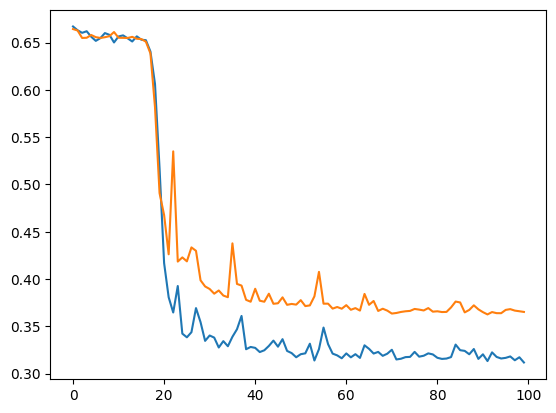

In [41]:
# plot the graph

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# above graph is still having a loss at above value 0.3

In [27]:
model3=Sequential()
# first hidden layer
model3.add(Dense(128,activation='relu',input_dim=3,kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1(0.001)))
#second hidden layer
model3.add(Dense(128,activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1(0.001)))
#3rd hidden layer
model3.add(Dense(128,activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1(0.001)))
model3.add(Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,665 (131.50 KB)

 Trainable params: 33,665 (131.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history3=model3.fit(sc_train_x,y_train,validation_data=(sc_test_x,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.7466 - loss: 4.1327 - val_accuracy: 0.9125 - val_loss: 3.7948
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8983 - loss: 3.7184 - val_accuracy: 0.9250 - val_loss: 3.5923
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9076 - loss: 3.5562 - val_accuracy: 0.9250 - val_loss: 3.4441
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9048 - loss: 3.4084 - val_accuracy: 0.9125 - val_loss: 3.2933
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9018 - loss: 3.2541 - val_accuracy: 0.9125 - val_loss: 3.1498
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9025 - loss: 3.0985 - val_accuracy: 0.9125 - val_loss: 3.0210
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9036 - loss: 2.9713 - val_accuracy: 0.9000 - val_loss: 2.8877
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9211 - loss: 2.8057 - val_accuracy: 0.

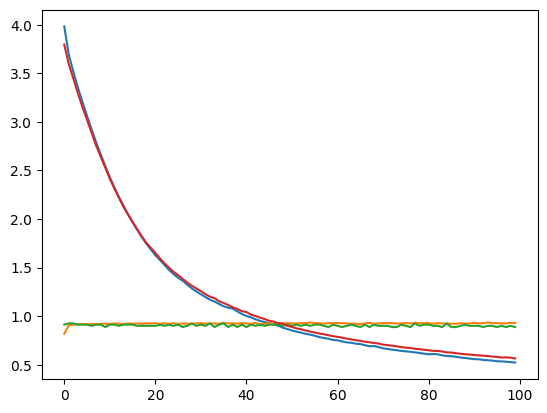

In [32]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history3.history['val_loss'])

In [33]:
# if accuracy is near to 1 it is good
# if loss is near to 0 it is good

In [34]:
# regularization reduces the gap b/w loss and val_loss
# regularization reduces the accuracy b/w loss and val_accuracy

In [35]:
# variance is difference b/w loss and val_loss
# feature selection is not there in Deep learning